In [28]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import os
import requests
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
import hvplot.pandas
import plotly.express as px
import seaborn as sns
from panel.interact import interact
from matplotlib import style
import matplotlib as mpl
import matplotlib.axes as ax
import re
import pylab
%matplotlib inline


In [29]:
# Your key here
AV_API_KEY = os.environ.get("AV_API_KEY")

# Chose your output format, or default to JSON (python dict)
#ts = TimeSeries(key, output_format='pandas')
#ti = TechIndicators(key)

In [4]:
cryptos = pd.read_csv('Resources/digital_currency_list.csv')
cryptos[cryptos['currency name'].str.contains('Bitcoin')]

,currency code,currency name
41,BCD,Bitcoin-Diamond
42,BCH,Bitcoin-Cash
45,BCX,BitcoinX
77,BTC,Bitcoin
78,BTCD,BitcoinDark
79,BTCP,Bitcoin-Private
80,BTG,Bitcoin-Gold
394,SBTC,Super-Bitcoin
500,XBC,Bitcoin-Plus


In [5]:
cryptos[cryptos['currency name'].str.contains('Ethereum')]

,currency code,currency name
166,ETC,Ethereum-Classic
167,ETH,Ethereum
168,ETHD,Ethereum-Dark


In [6]:
curr = pd.read_csv('Resources/physical_currency_list.csv')
curr[curr['currency code'] == 'USD']

,currency code,currency name
139,USD,United States Dollar


In [10]:
data = Path("Resources/S&P500.csv")
new_data= pd.read_csv(data, parse_dates=True, infer_datetime_format=True)
new_data = new_data.set_index('Date')
new_data.isnull().mean()
new_data.isnull().sum()
new_data = new_data.dropna()
new_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-24,2812.639893,2842.709961,2791.760010,2836.739990,2836.739990,5374480000
2020-04-27,2854.649902,2887.719971,2852.889893,2878.479980,2878.479980,5194260000
2020-04-28,2909.959961,2921.149902,2860.709961,2863.389893,2863.389893,5672880000
2020-04-29,2918.459961,2954.860107,2912.159912,2939.510010,2939.510010,6620140000
2020-04-30,2930.909912,2930.909912,2892.469971,2912.429932,2912.429932,3721235517


In [11]:
new_data = new_data.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
new_data = new_data.rename(columns={"Close": "S&P_500"})
new_data.head()

,S&P_500
Date,
2019-05-08,2879.419922
2019-05-09,2870.719971
2019-05-10,2881.399902
2019-05-13,2811.870117
2019-05-14,2834.409912


In [12]:
gold = Path("Resources/gold_price.csv")
new_gold= pd.read_csv(gold, parse_dates=True, infer_datetime_format=True)
new_gold = new_gold.set_index('Date')
new_gold.isnull().mean()
new_gold.isnull().sum()
new_gold = new_gold.dropna()
new_gold.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-26,1740.199951,1743.300049,1737.099976,1741.400024,1741.400024,269034.0
2020-04-27,1742.300049,1745.800049,1717.000000,1720.300049,1720.300049,80903668.0
2020-04-28,1713.000000,1731.900024,1704.099976,1721.000000,1721.000000,96211082.0
2020-04-29,1724.800049,1733.500000,1708.199951,1722.199951,1722.199951,156725.0
2020-04-30,1729.500000,1737.000000,1687.500000,1695.400024,1695.400024,110088974.0


In [13]:
gold_data = new_gold.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
gold_data = gold_data.rename(columns={"Close": "Gold"})
gold_data.head()

,Gold
Date,
2019-05-08,1279.400024
2019-05-09,1283.500000
2019-05-10,1285.699951
2019-05-13,1300.099976
2019-05-14,1294.699951


In [14]:
#resp.output_format ='pandas'
resp = requests.get('https://www.alphavantage.co/query', params={
    'function': 'DIGITAL_CURRENCY_DAILY',
    'symbol': 'BTC',
    'market': 'USD',
    'apikey': AV_API_KEY
})
doc_btc=resp.json()
doc_btc['Meta Data']
doc_btc['Time Series (Digital Currency Daily)']['2020-04-30']

{'1a. open (USD)': '8778.58000000',
 '1b. open (USD)': '8778.58000000',
 '2a. high (USD)': '9460.00000000',
 '2b. high (USD)': '9460.00000000',
 '3a. low (USD)': '8401.00000000',
 '3b. low (USD)': '8401.00000000',
 '4a. close (USD)': '8620.00000000',
 '4b. close (USD)': '8620.00000000',
 '5. volume': '206277.21412400',
 '6. market cap (USD)': '206277.21412400'}

In [15]:
resp_eth = requests.get('https://www.alphavantage.co/query', params={
    'function': 'DIGITAL_CURRENCY_DAILY',
    'symbol': 'ETH',
    'market': 'USD',
    'apikey': AV_API_KEY
})

doc_eth=resp_eth.json()
#doc_eth['Meta Data']
doc_eth['Time Series (Digital Currency Daily)']['2020-04-30']


{'1a. open (USD)': '215.40000000',
 '1b. open (USD)': '215.40000000',
 '2a. high (USD)': '227.30000000',
 '2b. high (USD)': '227.30000000',
 '3a. low (USD)': '202.00000000',
 '3b. low (USD)': '202.00000000',
 '4a. close (USD)': '206.08000000',
 '4b. close (USD)': '206.08000000',
 '5. volume': '1749691.00151000',
 '6. market cap (USD)': '1749691.00151000'}

In [16]:
df_btc = pd.DataFrame.from_dict(doc_btc['Time Series (Digital Currency Daily)'], orient='index', dtype=np.float)
df_eth = pd.DataFrame.from_dict(doc_eth['Time Series (Digital Currency Daily)'], orient='index', dtype=np.float)
df_eth.tail()

,1a. open (USD),1b. open (USD),2a. high (USD),2b. high (USD),3a. low (USD),3b. low (USD),4a. close (USD),4b. close (USD),5. volume,6. market cap (USD)
2020-04-28,196.33,196.33,198.50,198.50,192.36,192.36,196.24,196.24,6.368299e+05,6.368299e+05
2020-04-29,196.24,196.24,218.77,218.77,196.22,196.22,215.36,215.36,1.620423e+06,1.620423e+06
2020-04-30,215.40,215.40,227.30,227.30,202.00,202.00,206.08,206.08,1.749691e+06,1.749691e+06
2020-05-01,206.07,206.07,217.14,217.14,205.91,205.91,212.02,212.02,7.949140e+05,7.949140e+05
2020-05-02,212.01,212.01,213.20,213.20,211.02,211.02,213.05,213.05,1.637832e+04,1.637832e+04


In [17]:
[c for c in df_btc.columns.values if 'b.' in c]

['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)']

In [18]:
df_btc.drop(columns=[c for c in df_btc.columns.values if 'b.' in c], inplace=True)
df_btc.tail()

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume,6. market cap (USD)
2020-04-28,7773.51,7780.00,7659.12,7738.98,46302.752638,46302.752638
2020-04-29,7738.58,8952.89,7710.05,8778.57,183546.887514,183546.887514
2020-04-30,8778.58,9460.00,8401.00,8620.00,206277.214124,206277.214124
2020-05-01,8620.00,9059.18,8613.56,8826.96,91468.815059,91468.815059
2020-05-02,8825.67,8828.57,8762.00,8820.57,1450.243995,1450.243995


In [19]:
[c for c in df_eth.columns.values if 'b.' in c]
df_eth.drop(columns=[c for c in df_eth.columns.values if 'b.' in c], inplace=True)
df_eth.tail()

,1a. open (USD),2a. high (USD),3a. low (USD),4a. close (USD),5. volume,6. market cap (USD)
2020-04-28,196.33,198.50,192.36,196.24,6.368299e+05,6.368299e+05
2020-04-29,196.24,218.77,196.22,215.36,1.620423e+06,1.620423e+06
2020-04-30,215.40,227.30,202.00,206.08,1.749691e+06,1.749691e+06
2020-05-01,206.07,217.14,205.91,212.02,7.949140e+05,7.949140e+05
2020-05-02,212.01,213.20,211.02,213.05,1.637832e+04,1.637832e+04


In [20]:
combined_crypto = pd.concat([df_btc['4a. close (USD)'], df_eth['4a. close (USD)']], axis=1, join='inner')
combined_crypto.columns = ['BTC', 'ETH']
combined_crypto.tail()

,BTC,ETH
2020-04-28,7738.98,196.24
2020-04-29,8778.57,215.36
2020-04-30,8620.00,206.08
2020-05-01,8826.96,212.02
2020-05-02,8820.57,213.05


In [21]:
# Combined Data
combined_data = pd.concat([gold_data, new_data, combined_crypto], axis="columns", join="inner")
combined_data.head()

,Gold,S&P_500,BTC,ETH
2019-05-08,1279.400024,2879.419922,5987.29,170.85
2019-05-09,1283.500000,2870.719971,6209.18,170.90
2019-05-10,1285.699951,2881.399902,6373.33,172.91
2019-05-13,1300.099976,2811.870117,7790.71,195.84
2019-05-14,1294.699951,2834.409912,7947.56,216.40


<Figure size 2000x1000 with 0 Axes>

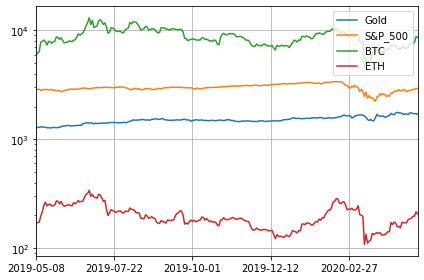

In [22]:
# Visualization
figure(num=None, figsize=(20, 10), dpi=100, facecolor='w', edgecolor='k')
combined_data.plot(logy=True)
plt.tight_layout()
plt.grid()
plt.show()

Calculate Daily Returns

In [23]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = combined_data.pct_change()
daily_returns.head()

,Gold,S&P_500,BTC,ETH
2019-05-08,NaN,NaN,NaN,NaN
2019-05-09,0.003205,-0.003021,0.037060,0.000293
2019-05-10,0.001714,0.003720,0.026437,0.011761
2019-05-13,0.011200,-0.024131,0.222392,0.132612
2019-05-14,-0.004154,0.008016,0.020133,0.104984


Calculate Correlation

In [24]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = daily_returns.corr()
correlation

,Gold,S&P_500,BTC,ETH
Gold,1.000000,0.048687,0.121004,0.084852
S&P_500,0.048687,1.000000,0.306256,0.407560
BTC,0.121004,0.306256,1.000000,0.861196
ETH,0.084852,0.407560,0.861196,1.000000


Plot Correlation

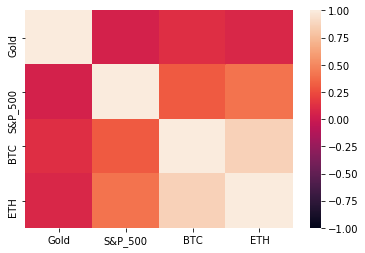

In [27]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=-1, vmax=1)

In [50]:
import yfinance as yf
tickers = ['BTC-USD', 'GC=F', 'ETH', '^GSPC', 'XRP-USD' ]

data = yf.download(tickers, '2019-04-01', '2020-05-01')['Close']
data.columns = ['Bitcoin','Etherum', 'Ripple', 'S&P500', 'Gold' ]
data

[*********************100%***********************]  5 of 5 completed


,Bitcoin,Etherum,Ripple,S&P500,Gold
Date,,,,,
2019-04-01,4158.183105,19.180000,1288.400024,0.312747,2867.189941
2019-04-02,4879.877930,18.959999,1290.000000,0.351499,2867.239990
2019-04-03,4973.021973,19.170000,1289.900024,0.342234,2873.399902
2019-04-04,4922.798828,19.500000,1289.000000,0.332513,2879.389893
2019-04-05,5036.681152,19.559999,1290.400024,0.361803,2892.739990
2019-04-06,5059.817383,NaN,NaN,0.354405,NaN
2019-04-07,5198.896973,NaN,NaN,0.359856,NaN
2019-04-08,5289.770996,19.559999,1297.099976,0.358234,2895.770020
2019-04-09,5204.958496,19.469999,1303.500000,0.349462,2878.199951


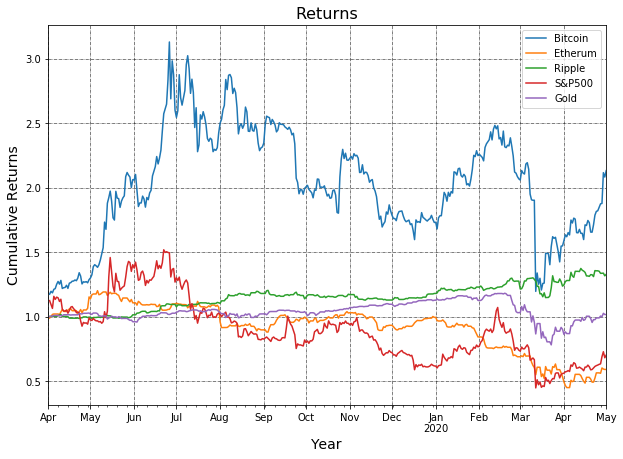

In [51]:
# Plot all the close prices
((data.pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()